# MANU 465 Assignment 2 - Titanic Survivor Classification

### Author:

Liam Bontkes, 25530163

## 1 Project Description

The goal of this project is to create a model which can accurately predict if a passenger survived the Titanic sinking
incident, using a dataset of passenger information. Five different machine learning models are compared are trained and
compared to give the best result: Discriminant Analysis, KNN, Naive Bayes, SVM-Linear, SVM-Nonlinear.

## 2 Import libraries

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 3. Initial Data Preprocessing

### 3.1 Import the dataset

In [372]:
dataset = pd.read_csv('../data/Titanic.csv')

### 3.2 View the data

In [373]:
pd.DataFrame(dataset)

,PassengerId,Pclass,Name,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,No
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Yes
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Yes
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,No
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,No
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Yes
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,No
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Yes


### 3.3 Review the data

In [374]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PassengerId                        891 non-null    int64  
 1   Pclass                             891 non-null    int64  
 2   Name                               891 non-null    object 
 3   Sex                                891 non-null    object 
 4   Age                                714 non-null    float64
 5   Number of Siblings/Spouses Aboard  891 non-null    int64  
 6   Number of Parents/Children Aboard  891 non-null    int64  
 7   Fare                               891 non-null    float64
 8   Embarked                           889 non-null    object 
 9   Survived                           891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### 3.4 Encode the categorical data

In [375]:
# passenger sex: male and female
sexes = {
    'male': 0.0,
    'female': 1.0
}
dataset['Sex'] = dataset['Sex'].map(sexes)
pd.DataFrame(dataset['Sex'])

,Sex
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,1.0
889,0.0


In [376]:
# passenger port of embarkation
ports = {
    'S': 0.0,
    'C': 1.0,
    'Q': 2.0
}
dataset['Embarked'] = dataset['Embarked'].map(ports)
pd.DataFrame(dataset['Embarked'])

,Embarked
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
886,0.0
887,0.0
888,0.0
889,1.0


### 3.5 Encode the output data

In [377]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# whether or not they survived
dataset['Survived'] = le.fit_transform(dataset['Survived'])
pd.DataFrame(dataset['Survived'])

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## 4 Determine the relevant features of the dataset

### 4.1 Check the correlation between the inputs and output features

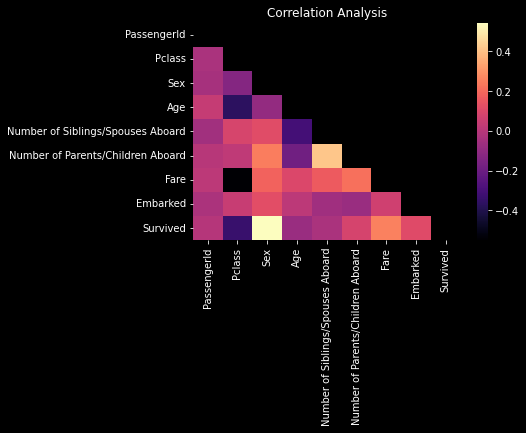

Survived                             1.000000
Sex                                  0.543351
Fare                                 0.257307
Embarked                             0.108669
Number of Parents/Children Aboard    0.081629
PassengerId                         -0.005007
Number of Siblings/Spouses Aboard   -0.035322
Age                                 -0.077221
Pclass                              -0.338481
Name: Survived, dtype: float64

In [378]:
from seaborn import heatmap

corr_matrix = dataset.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Only keep the upper triangle of an array.

plt.style.use('dark_background')
plt.figure()
plt.title('Correlation Analysis')
heatmap(
    corr_matrix,
    mask=mask,
    annot=False,
    lw=0,
    linecolor='white',
    cmap='magma',
    fmt="0.2f"
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

corr_matrix['Survived'].sort_values(ascending=False)

All the inputs have reasonable correlation, so will keep all of them.

## 5 Split the Dataset into Training and Test Sets

In [379]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size=0.2)

train_y = train_data[['Survived']].copy()
test_y = test_data[['Survived']].copy()

train_x = train_data.drop(['PassengerId', 'Name'], axis=1)  # drop passenger id and name because they are irrelevant
test_x = test_data.drop(['PassengerId', 'Name'], axis=1)

train_x.info()

train_x = train_x.to_numpy()
test_x = test_x.to_numpy()

train_y = train_y.to_numpy()
train_y = train_y.ravel()
test_y = test_y.to_numpy()
test_y = test_y.ravel()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 419 to 83
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             712 non-null    int64  
 1   Sex                                712 non-null    float64
 2   Age                                577 non-null    float64
 3   Number of Siblings/Spouses Aboard  712 non-null    int64  
 4   Number of Parents/Children Aboard  712 non-null    int64  
 5   Fare                               712 non-null    float64
 6   Embarked                           710 non-null    float64
 7   Survived                           712 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 50.1 KB


### 5.1 Fill missing data

In [380]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_x = imputer.fit_transform(train_x)
test_x = imputer.fit_transform(test_x)

## 6 Visualise the Data

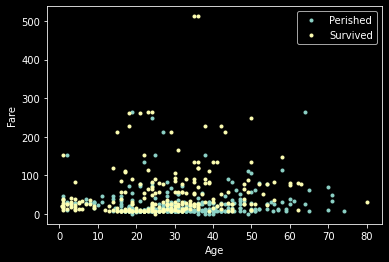

In [381]:
def plot_scatter_with_labels(x1, x2, y, x_label='Age', y_label='Fare'):
    df = pd.DataFrame(
        dict(
            x1=x1,
            x2=x2,
            label=y
        )
    )
    groups = df.groupby('label')

    for number, group in groups:
        if number == 0:
            name = 'Perished'
        elif number == 1:
            name = 'Survived'
        plt.plot(
            group.x1,
            group.x2,
            marker="o",
            linestyle="",
            ms=3,
            label=name)

    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)


plot_scatter_with_labels(
    x1=train_data['Age'],
    x2=train_data['Fare'],
    y=train_data['Survived']
)

## 7 Scale the Features

In [382]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

## 8 Test and Train Different Machine Learning Models

### 8.1 Discriminant Analysis Classifier

In [383]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

da_model = LinearDiscriminantAnalysis()
da_model.fit(train_x, train_y)

LinearDiscriminantAnalysis()

#### Cross Validation

In [384]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(da_model, train_x, train_y, scoring='accuracy', cv=5)  # 5-fold
print(f'Averaged prediction accuracy = {np.average(scores)}')

avg_cv_scores = dict()
avg_cv_scores['da_model'] = np.average(scores)

Averaged prediction accuracy = 1.0


#### Visualisation

In [385]:
def plot_decision_boundary(model, axes, inverse_transform=False):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(x).reshape(100, 100)
    if inverse_transform:
        x = scaler.inverse_transform(np.c_[x0s, x1s])
        x0, x1 = np.meshgrid(x[:, 0], x[:, 1])
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)


def plot_prediction_results(model, x, y):
    plot_decision_boundary(model, [-3, 3, -3, 3])
    plot_scatter_with_labels(x[:, 0], x[:, 1], y, xlabel='Scaled Age', ylabel='Scaled Fare')

# plot_prediction_results(da_model, train_x, train_y)

### 8.2 Naive Bayes Classifier

In [386]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(train_x, train_y)

scores = cross_val_score(nb_model, train_x, train_y, scoring='accuracy', cv=5)

print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['nb_model'] = np.average(scores)

Averaged prediction accuracy =  1.0


### 8.3 K-Nearest Neighbors

In [387]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_x, train_y)

scores = cross_val_score(knn_model, train_x, train_y, scoring='accuracy', cv=5)

print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['knn_model'] = np.average(scores)

Averaged prediction accuracy =  0.9901703929872945


### 8.4 Linear SVM

In [388]:
from sklearn.svm import SVC

svm_linear_model = SVC(kernel='linear')
svm_linear_model.fit(train_x, train_y)

scores = cross_val_score(svm_linear_model, train_x, train_y, scoring='accuracy', cv=5)

print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['svm_linear_model'] = np.average(scores)

Averaged prediction accuracy =  1.0


### 8.5 Nonlinear SVM (Gaussian Kernel)

In [389]:
from sklearn.svm import SVC

svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(train_x, train_y)

scores = cross_val_score(svm_rbf_model, train_x, train_y, scoring='accuracy', cv=5)

print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['svm_nonlinear'] = np.average(scores)

Averaged prediction accuracy =  0.9985915492957746


### 8.6 Decision Tree

In [390]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train_x, train_y)

scores = cross_val_score(tree_model, train_x, train_y, scoring='accuracy', cv=5)

print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['decision_tree'] = np.average(scores)

Averaged prediction accuracy =  1.0


## 9 Comparing and Selecting the Model

In [395]:
# see the model performances
for model in avg_cv_scores:
    print(f"Average Cross Validation score for the {model}: {avg_cv_scores[model]}")

Average Cross Validation score for the da_model: 1.0
Average Cross Validation score for the nb_model: 1.0
Average Cross Validation score for the knn_model: 0.9901703929872945
Average Cross Validation score for the svm_linear_model: 1.0
Average Cross Validation score for the svm_nonlinear: 0.9985915492957746
Average Cross Validation score for the decision_tree: 1.0


In [392]:
# test all models with 100% accuracy
test_models = [
    ('Linear Discriminant', da_model),
    ('Naive Bayes', nb_model),
    ('SVM Linear', svm_linear_model),
    ('Decision Tree', tree_model)
]

for model in test_models:
    pred_y = model[1].predict(test_x)
    print(f"Test accuracy of the {model[0]} model: {np.sum(pred_y == test_y) / len(pred_y)}")

Test accuracy of the Linear Discriminant model: 1.0
Test accuracy of the Naive Bayes model: 1.0
Test accuracy of the SVM Linear model: 1.0
Test accuracy of the Decision Tree model: 1.0


## 9 Conclusion

All the classifier models performed very well, with 4 of the models achieving an average cross validation accuracy AND
test accuracy of 100%. This can be attributed to 4 of the features having a strong correlation with the output; the
'Sex' feature in particular is very highly correlated (~0.54).

The most performant models tested were the Linear Discriminant, Naive Bayes, Linear SVM, and Decision Tree models.